<a href="https://colab.research.google.com/github/joao-pedro-203/Portif-lio/blob/main/AulaPratica_VIsualDadosPhython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   id_venda  data_venda    produto    categoria  valor_venda
0         1  2023-01-01  Produto A  Eletrônicos       1500.0
1         2  2023-01-05  Produto B       Roupas        350.0
2         3  2023-02-10  Produto C  Eletrônicos       1200.0
3         4  2023-03-15  Produto D       Livros        200.0
4         5  2023-03-20  Produto E  Eletrônicos        800.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venda     14 non-null     int64  
 1   data_venda   14 non-null     object 
 2   produto      14 non-null     object 
 3   categoria    14 non-null     object 
 4   valor_venda  14 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 692.0+ bytes
None
       id_venda           data_venda  valor_venda
count   14.0000                   14    14.000000
mean     7.5000  2023-06-09 00:00:00   628.571429
min      1.0000 

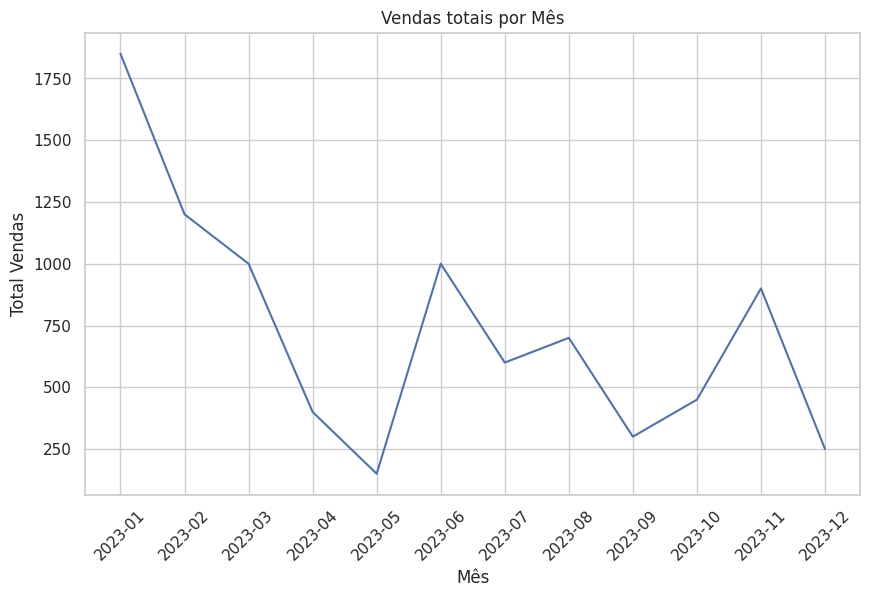

In [13]:
import sqlite3
import pandas as pd

#Conectando ao banco de dados
conn=sqlite3.connect('dados_vendas.db')
query='SELECT*FROM Vendas'
df=pd.read_sql_query(query,conn)
conn.close()

print(df.head())
print(df.info())

#Removendo valores ausentes
df.dropna(inplace=True)

#Removendo duplicatas
df.drop_duplicates(inplace=True)

# Convert 'data_venda' to datetime
df['data_venda'] = pd.to_datetime(df['data_venda'])

print(df.describe())

#Agrupando por mês para ver padrão de vendas
vendas_por_mes=df.groupby(df['data_venda'].dt.to_period('M'))['valor_venda'].sum().reset_index()
vendas_por_mes['data_venda'] = vendas_por_mes['data_venda'].astype(str)
vendas_por_mes.rename(columns={'valor_venda': 'vendas_totais'}, inplace=True)
print(vendas_por_mes)

import matplotlib.pyplot as plt
import seaborn as sns

#Configuração de estilo
sns.set(style='whitegrid')

#Gráfico de barras
plt.figure(figsize=(10,6))
sns.lineplot(data=vendas_por_mes,x='data_venda',y='vendas_totais')
plt.title('Vendas totais por Mês')
plt.xlabel('Mês')
plt.ylabel('Total Vendas')
plt.xticks(rotation=45)
plt.show()